<a href="https://colab.research.google.com/github/svitoria14/projetos_aulas_alura/blob/main/Desafio_gr%C3%A1ficos_de_compara%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio: gráficos de comparação - Séries de tempo**
Para praticar a criação de gráficos de séries de tempo, vamos utilizar um conjunto de dados contendo um relatório de vendas das lojas de departamentos de 2016 a 2019, disponível no github de cursos da Alura.

Neste desafio, a missão é construir as seguintes visualizações:


*   Como estão as vendas por semestre no estado de Minas Gerais? Destacar os valores máximos e mínimos de venda.
*   Comparar os lucros anuais dos estados da região Nordeste por meio de um gráfico de linhas.

In [18]:
# Definindo uma paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#000080', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
MAGENTA1, VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#c20078', '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#006400'

# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px

# Importando o relatório de vendas a ser utilizado
vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")
vendas["data_pedido"] = pd.to_datetime(vendas["data_pedido"], format="%Y-%m-%d")
vendas.head()


,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28


# **Análise 1**
Como estão as vendas por semestre no estado de Minas Gerais?
Destacar os valores máximos e mínimos de venda.

In [19]:
# Selecionar vendas por estado
vendas_mg = vendas.copy()
vendas_mg = vendas_mg.query('estado=="Minas Gerais"')[["data_pedido", "vendas"]]

# Somar as vendas e apresentar este dado por semestre
vendas_mg.set_index("data_pedido", inplace=True)
vendas_mg = vendas_mg.resample("2QE", closed='left').agg("sum")
vendas_mg = vendas_mg.reset_index()
vendas_mg

,data_pedido,vendas
0,2016-06-30,24139.56
1,2016-12-31,89752.72
2,2017-06-30,37837.01
3,2017-12-31,60390.09
4,2018-06-30,28400.97
5,2018-12-31,82328.99
6,2019-06-30,69152.18
7,2019-12-31,97310.09


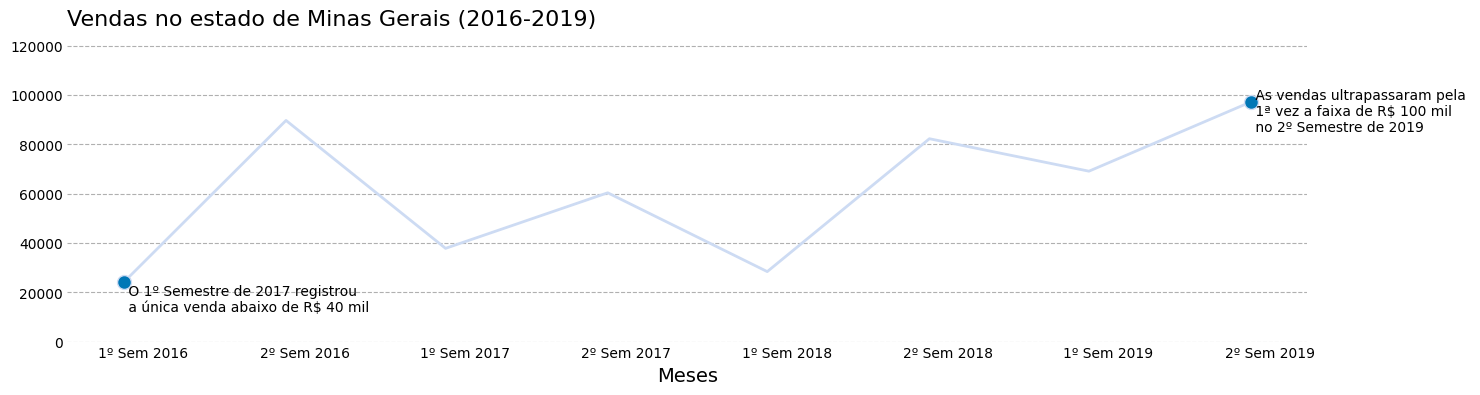

In [20]:
venda_min = vendas_mg.vendas.min()
venda_max = vendas_mg.vendas.max()
valores = vendas_mg.vendas.values

ponto_destaque = list((valores == venda_min) | (valores == venda_max))

# Criando um gráfico de vendas por semestre
fig, ax = plt.subplots(figsize=(16,4))
ax.plot(vendas_mg["data_pedido"], vendas_mg["vendas"], lw = 2, color = AZUL5, marker = "o",
          markersize = 10, markerfacecolor = AZUL2, markevery = ponto_destaque)

ax.set_title('Vendas no estado de Minas Gerais (2016-2019)', fontsize = 16, loc='left')
ax.set_xlabel('Meses', fontsize = 14)
ax.set_ylabel('')
ax.grid(axis = "y", linestyle="--")
ax.set_frame_on(False)
ax.tick_params(axis='both', which='both', length=0)
plt.ylim(0, 1.25e5)

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[6,12]))
labels = ["1º Sem 2016", "2º Sem 2016", "1º Sem 2017", "2º Sem 2017",
          "1º Sem 2018", "2º Sem 2018", "1º Sem 2019", "2º Sem 2019"]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(labels, ha = "left")

# Adicionando legenda nos pontos de destaque
for x, y in zip(vendas_mg.data_pedido, vendas_mg.vendas):
  if y == venda_min:
    ax.text(x, y = y - 1.2e4, s = f" O 1º Semestre de 2017 registrou \n a única venda abaixo de R$ 40 mil", fontsize = 10)
  if y == venda_max:
    ax.text(x, y = y - 1.2e4, s = f" As vendas ultrapassaram pela \n 1ª vez a faixa de R$ 100 mil \n no 2º Semestre de 2019", fontsize = 10)

plt.show()

# **Análise 2**
Comparar os lucros anuais dos estados da região Nordeste por meio de um gráfico de linhas.

In [21]:
# Criando um novo dataframe para não alterar os anteriores
vendas_ne = vendas.copy()
vendas_ne = vendas_ne.query("regiao == 'Nordeste'")[["estado","data_pedido", "lucro"]]
vendas_ne

,estado,data_pedido,lucro
13,Ceará,2018-12-06,225.39
17,Bahia,2016-08-28,4.22
18,Bahia,2016-08-28,27.21
19,Bahia,2016-08-28,12.56
20,Bahia,2018-12-10,8.61
...,...,...,...
8934,Rio Grande do Norte,2017-05-18,27.40
8936,Bahia,2019-11-18,48.96
8937,Bahia,2019-11-18,94.60
8938,Paraíba,2016-01-22,6.96


In [22]:
# Criando uma tabela cruzada (crosstab) com os valores de lucro por dia por estado
df_vendas_ne = pd.crosstab(index = vendas_ne.data_pedido, columns = vendas_ne.estado, values = vendas_ne.lucro, aggfunc="sum")

# Agrupando os lucros por ano e por milhar
df_vendas_ne = df_vendas_ne.resample('YE').agg('sum')
df_vendas_ne = round(df_vendas_ne/1e3, 2)
df_vendas_ne

estado,Alagoas,Bahia,Ceará,Maranhão,Paraíba,Pernambuco,Piauí,Rio Grande do Norte,Sergipe
data_pedido,,,,,,,,,
2016-12-31,1.20,9.98,10.25,1.88,-0.27,11.73,0.02,0.27,0.89
2017-12-31,3.77,6.89,9.88,1.60,-2.20,4.24,1.43,0.65,0.98
2018-12-31,3.13,8.59,6.40,2.69,0.15,9.18,5.43,1.44,0.55
2019-12-31,1.45,14.09,30.26,5.07,1.60,6.98,1.34,2.09,1.95


In [23]:
# Criando uma figura
fig = px.line(df_vendas_ne, x=df_vendas_ne.index, y=df_vendas_ne.columns, markers = True, labels={"estado": "Estados"},
              color_discrete_sequence=[AZUL2, VERMELHO1, AMARELO1 , VERDE1, MAGENTA1, AZUL1, LARANJA1, VERDE2, AZUL3])

# Ajustando layout e eixos
fig.update_layout(width=1200, height=500, font_family = 'Arial', font_size=14,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=20,
                  title_text='Lucros das lojas de departamentos por ano na Região Nordeste' +
                             '<br><sup size=1 style="color:#555655">entre 2016 e 2019</sup>',
                  xaxis_title='', yaxis_title='', plot_bgcolor= CINZA5)

fig.update_yaxes(tickprefix="R$ ", ticksuffix=" mil")
labels = ['2016', '2017', '2018', '2019']
fig.update_xaxes(ticktext = labels, tickvals=df_vendas_ne.index)

fig.update_traces(mode="markers+lines", hovertemplate = "<b>Período:</b> %{x} <br> <b>Lucro:</b> %{y}")

fig.show()